[0.01504779 0.08440543 0.33881239 0.50349563 1.05018123 2.808     ] [0.00986121 0.05562151 0.10396419 0.33117945 3.77862324 0.581     ]
[0.117      1.43916667 2.76133333 4.0835     5.40566667 6.72783333
 8.05      ]


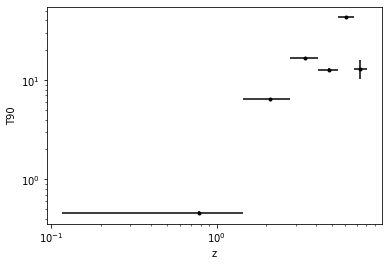

In [1]:
# Code to create Maximum likelihood contour plots for A and B (theta_0 and theta_1)

import numpy as np
from astropy.io import ascii
from scipy.optimize import curve_fit
from matplotlib.pylab import plt
data=ascii.read('grb.txt')  
z=(data['z'])  # variable z is really 1+z
t90=(data['T90_(s)'])
t50=(data['T50_(s)'])

t90err= (data['T90_error'])
t50err= (data['T50_error'])

wtt90=t90/(t90err**2)
wtt50=t50/(t50err**2)

err90=1/(t90err**2)
err50=1/(t50err**2)
n,bin_edges=np.histogram(z,bins=6)
x_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])  
xbin=0.5*(bin_edges[1]-bin_edges[0])
digitized_array = np.digitize(z, bins = bin_edges)


y90=np.array([np.sum(wtt90[digitized_array == i])   for i in set(digitized_array)])
yerr90=np.array([np.sum(err90[digitized_array == i])   for i in set(digitized_array)])

y50=np.array([np.sum(wtt50[digitized_array == i])   for i in set(digitized_array)])
yerr50=np.array([np.sum(err50[digitized_array == i])   for i in set(digitized_array)])

wtmean90=y90/yerr90
wtmean50=y50/yerr50

errwtmean90=np.sqrt(1.0/yerr90)
errwtmean50=np.sqrt(1.0/yerr50)

print (errwtmean90,errwtmean50)

plt.errorbar(x_mid,wtmean90,yerr=errwtmean90,xerr=xbin,fmt='.k')

#Plotting weighted means for T90
print (bin_edges)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('z')
plt.ylabel('T90')
plt.savefig('binnedgrb90.pdf')

[0.117      1.43916667 2.76133333 4.0835     5.40566667 6.72783333
 8.05      ]


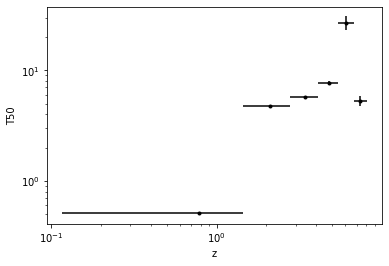

In [2]:
#Plotting weighted means for T50

plt.errorbar(x_mid,wtmean50,yerr=errwtmean50,xerr=xbin,fmt='.k')

print (bin_edges)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('z')
plt.ylabel('T50')
plt.savefig('binnedgrb50.pdf')

In [9]:
wtmean90

array([ 0.4623549 ,  6.4052634 , 16.82631344, 12.69309053, 42.61095364,
       12.96      ])

In [10]:
errwtmean90

array([0.01504779, 0.08440543, 0.33881239, 0.50349563, 1.05018123,
       2.808     ])

In [32]:
bin_edges

array([0.117     , 0.99844444, 1.87988889, 2.76133333, 3.64277778,
       4.52422222, 5.40566667, 6.28711111, 7.16855556, 8.05      ])

In [34]:
x_mid

array([0.55772222, 1.43916667, 2.32061111, 3.20205556, 4.0835    ,
       4.96494444, 5.84638889, 6.72783333, 7.60927778])

In [38]:

z_err=x_mid-bin_edges[0:9]

In [44]:
errwtmean50

array([0.01325071, 0.01456355, 0.07133651, 0.12106195, 0.18127133,
       0.58001176, 4.88889883, 5.955     , 0.581     ])